### Code from last lecture

In [ ]:
# Code from last lecture

import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 9]
def f(z):
  return z**2-1

def doesEscape(f,z):
  '''
  Checks whether the sequence z, f(z), f(f(z)), f(f(f(z))).... escape
  to infinity or not.

  Inputs: 
   -- f, a function
   -- z, a complex number
   Returns:
   true/false depending on whether orbit escapes to infinity or not.

  '''
  current = z 
  for _ in range(30):
    # If |z| > 2 then |z^2-1| > 3 and so we are sure to escape.
    if abs(current) > 2:
      return True
    current = f(current)
  return False 


def numIterationsToEscape(f,z, maxIters):
  '''
Determines how many iterations it takes for z to escape 
the disk of radius 2 around the origin.

  Inputs: 
   -- f, a function
   -- z, a complex number
   -- maxIters, an integer
   Returns:
   -- number of iterations required to escape. If it takes 
   more than maxIters, it returns maxIters.

  '''
  current = z 
  for i in range(maxIters):
    # If |z| > 2 then |z^2-1| > 3 and so we are sure to escape.
    if abs(current) > 2:
      return i/maxIters
    current = f(current)
  return i/maxIters

def computeEscaping(f, center, sideLength, subs, maxIters):
  '''
  Inputs: 

  -- f,  a function C->C
  -- center, a complex number
  -- sideLength, a real number (used to be 4, since [-2,2]^2 has length 4)
  -- subs, an integer, number of subdivisions

    We'll subdivide the square centered at the center, with given sidelength
     into little squares
        and test points in the center of each square.
        If the tested point escapes, we mark a '1' in the matrix.
  '''
  delta = sideLength/(2*subs) 
  startx = center.real- sideLength/2
  starty = center.imag - sideLength/2
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub
  for i in range(subs):
    for j in range(subs):
      z = complex(startx+delta,starty+delta)+complex(i*2*delta, j*2*delta)
      results[j,i] = numIterationsToEscape(f,z, maxIters) 
  return results 


# Plot an image of the matrix, where 
# 1s are yellow and 0s are purple:


### Lecture 16

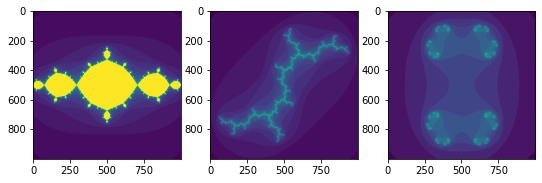

In [ ]:
g=computeEscaping(lambda z: z**2-1, center=0 , sideLength=3 ,subs=1000, maxIters=30)
h=computeEscaping(lambda z: z**2+1j, center=0 , sideLength=3 ,subs=1000, maxIters=30)
i=computeEscaping(lambda z: z**2+1/4+0.4, center=0 , sideLength=3 ,subs=1000, maxIters=30)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(g)
ax2.imshow(h)
ax3.imshow(i)

### Mandelbrot set 

Recall: K(f) is the non-escaping set; the set of points z for which the sequence
z, f(z), f(f(z)), ....
 stays bounded.

 Mandelbrot set, M: The set of c for which K(z^2+c) is connected.
 E.g.
 - 0.3+0.2j is in M.
 - 0 is in M.
 - 0.5 + 0.5j is not in M.

 Here's a possible algorithm for drawing M:

 - Loop through every possible c value in some subdivision of a rectangle.
 - Check if K(z^2+c) is connected, if so, color the pixel black, otherwise white.

 Instead: 

 **Theorem:** K(z^2+c) is connected if and only if the orbit of 0 under 
 f(z)=z^2+c is bounded.

 E.g. c=0 is in M, because orbit of 0 under z^2+0 is 0->0->0....
 E.g. c=i is in M, because the orbit of 0 under z^2+i is 
 0 -> i -> -1+i -> -i -> -1+i -> -i -> -1+i -> ....




#### Questions
0. Write a function that draws the mandelbrot set.
1. Zoom in at the mandelbrot set at the following points:
{ -1.9408, -1.3107, -0.15652 - 1.03225 I, -0.15652 + 1.03225 I, 
 0.282271 - 0.530061 I, 0.282271 + 0.530061 I}.
 What do you observe? Can you explain why?

2. Look at the non-escaping sets at those parameter values.
 What do you observe? Why?

3. Choose a parameter c, like c=1j. Zoom into the Mandelbrot set at that point. Zoom into the non-escaping set for z^2+c.  Plot them side by side.
What do you observe? Why?

In [ ]:
pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.6 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21081 sha256=fd15bee4ff19bcd48fa5b9a9748c74cca0e9ecd289b483aaade3c03d9b4b2cc9
  Stored in directory: /root/.cache/pip/wheels/8a/5e/f2/b643523c676b55f300b6fc8bd7ca65a358a983d5ad91730a71
Successfully built mplcursors


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def mandelbrot_set(center, sideLength, subs, maxIters):
  
  delta = sideLength/(2*subs) 
  startx = center.real- sideLength/2
  starty = center.imag - sideLength/2
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub

  for i in range(subs):
    for j in range(subs):
      c = complex(startx+delta,starty+delta)+complex(i*2*delta, j*2*delta)
      results[j,i] = results[j,i] = numIterationsToEscape(lambda z: z**2+c, 0, maxIters) 
  return results 

In [ ]:
a = mandelbrot_set(center=0 , sideLength=3 ,subs=1000, maxIters=30)
plt.imshow(a)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

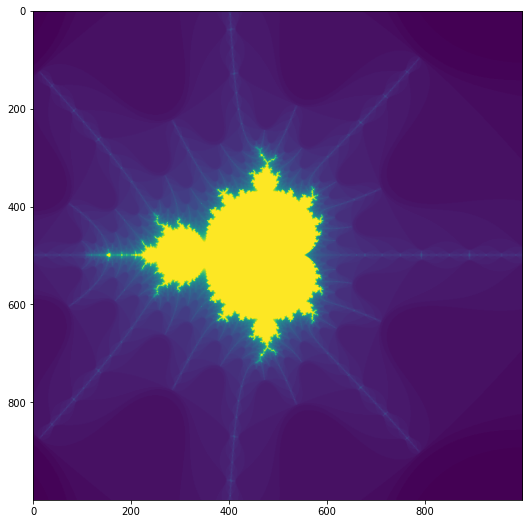

In [ ]:
a = mandelbrot_set(center= -1.9408 , sideLength=0.005 ,subs=1000, maxIters=100)
plt.imshow(a)

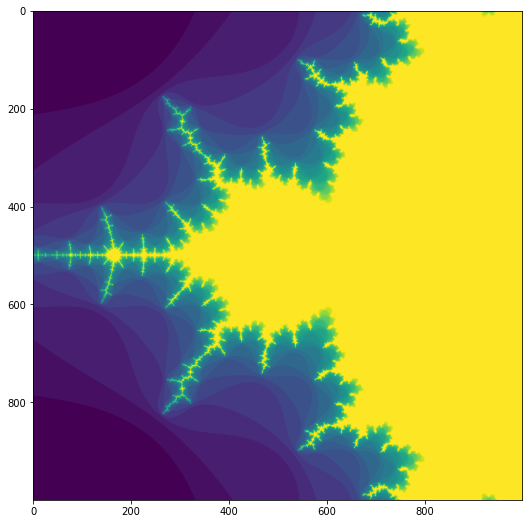

In [ ]:
a = mandelbrot_set(center= -1.3107 , sideLength=0.5 ,subs=1000, maxIters=30)
plt.imshow(a)

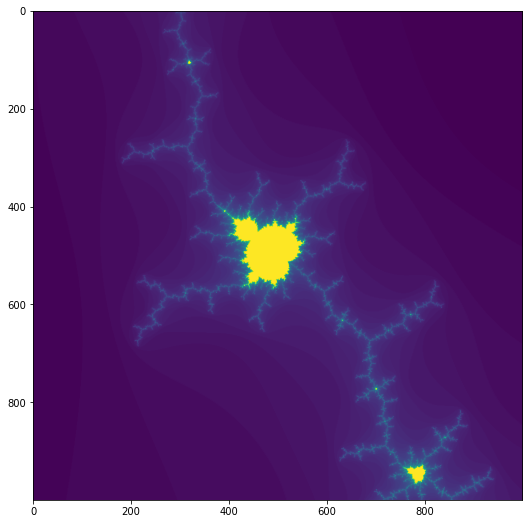

In [ ]:
a = mandelbrot_set(center=  -0.15652 - 1.03225j , sideLength=0.1 ,subs=1000, maxIters=100)
plt.imshow(a)